In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


In [5]:
info_csv = 'ERR505104.containment-comparisons.csv'
df = pd.read_csv(info_csv, index_col=0)

In [6]:
df

,genome,n_chrom,n_snps,n_genome_bp,n_missed_bp,f_missed_bp,n_covered_bp,f_covered_bp,avg_coverage,effective_coverage,...,n_diff3_read,% map_to_assembly,metagenome,trim_cont,assem_cont,mapassem_cont,assem_v_trim,mapassem_v_trim,mapassem_v_assem,coverage_category
0,GCA_018365095,200,13579,2787952,553178,0.198417,2234774,0.801583,2.100456,2.620386,...,32421,46.80%,ERR505104,0.617112,0.172549,0.200713,0.444563,0.416399,0.028164,<10
1,GCA_934318055,81,58583,2923275,530905,0.181613,2392370,0.818387,11.040318,13.490341,...,25070,92.77%,ERR505104,0.574359,0.168889,0.307692,0.405470,0.266667,0.138803,10-20
2,GCA_905197755,94,20697,3068347,822560,0.268079,2245787,0.731921,3.136789,4.285694,...,31687,68.71%,ERR505104,0.526927,0.156724,0.177362,0.370203,0.349565,0.020639,<10
3,GCA_000508445,355,14340,2176530,180640,0.082994,1995890,0.917006,3.178218,3.465866,...,23195,67.48%,ERR505104,0.784439,0.424256,0.474600,0.360183,0.309840,0.050343,<10
4,GCF_020558795,147,9414,3019513,1334242,0.441873,1685271,0.558127,2.310179,4.139166,...,24724,68.19%,ERR505104,0.383654,0.033435,0.044917,0.350220,0.338737,0.011483,<10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,GCA_900538755,38,20268,3004049,130359,0.043394,2873690,0.956606,33.020922,34.518848,...,410,99.96%,ERR505104,0.829376,0.824966,0.828697,0.004410,0.000678,0.003731,20-50
226,GCA_900550255,28,6274,1071692,137500,0.128302,934192,0.871698,9.094525,10.433112,...,149,99.85%,ERR505104,0.733711,0.729934,0.731822,0.003777,0.001889,0.001889,10-20
227,GCA_003531605,37,2658,1833693,36859,0.020101,1796834,0.979899,12.861726,13.125563,...,382,99.84%,ERR505104,0.949915,0.947069,0.945931,0.002846,0.003984,-0.001138,10-20
228,GCA_934880285,57,22904,2949092,172921,0.058635,2776171,0.941365,31.377708,33.332150,...,204,99.98%,ERR505104,0.781336,0.779614,0.781336,0.001722,0.000000,0.001722,20-50


In [7]:
df.columns

Index(['genome', 'n_chrom', 'n_snps', 'n_genome_bp', 'n_missed_bp',
       'f_missed_bp', 'n_covered_bp', 'f_covered_bp', 'avg_coverage',
       'effective_coverage', 'genome_id', 'sample_id', 'n_mapped_reads',
       'n_diff_reads', '% assembled', 'n_diff3_read', '% map_to_assembly',
       'metagenome', 'trim_cont', 'assem_cont', 'mapassem_cont',
       'assem_v_trim', 'mapassem_v_trim', 'mapassem_v_assem',
       'coverage_category'],
      dtype='object')

# Jean's original plot

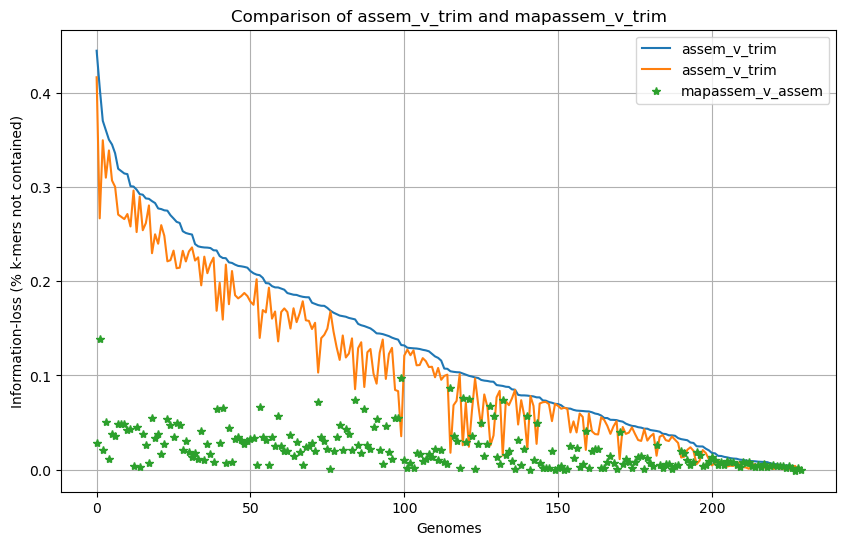

In [4]:
# If we sort one value as a baseline, then plot the other value on top of that
df = df.sort_values(by='assem_v_trim', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.plot(df.assem_v_trim, label='assem_v_trim')
plt.plot(df.mapassem_v_trim, label='assem_v_trim')
plt.plot(df.mapassem_v_assem, "*", label='mapassem_v_assem')

plt.xlabel('Genomes')
plt.ylabel('Information-loss (% k-mers not contained)')
plt.title('Comparison of assem_v_trim and mapassem_v_trim')
plt.legend()
plt.grid(True)
plt.show()

# Modification ideas (NTP):

do we really need to know the starting percentage? we could normalize all trim containment to 100%, since all other numbers are 'losses' from that 100%.

In [5]:
# normalize assem/mapassem containment by the starting (trimmed read) containment
df['norm_assem'] = df['assem_cont']/df['trim_cont']
df['norm_mapassem'] = df['mapassem_cont']/df['trim_cont']


# mpl version

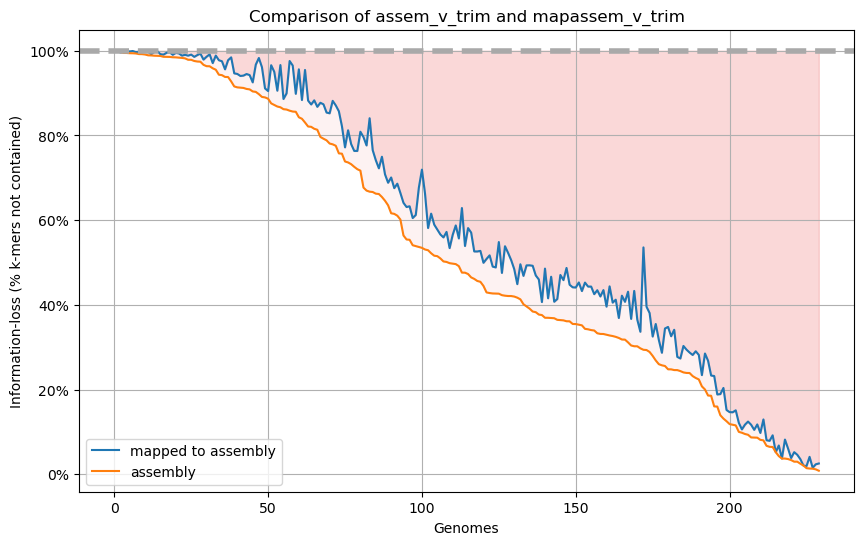

In [6]:
df = df.sort_values(by='norm_assem', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.plot(df.norm_mapassem, label='mapped to assembly')
plt.plot(df.norm_assem, label='assembly')
plt.axhline(y=1, color='darkgrey', linestyle='--', linewidth=4)  # Add horizontal line at y=1 for 100%
plt.fill_between(df.index, df['norm_mapassem'], 1, color='lightcoral', alpha=0.3)
plt.fill_between(df.index, df['norm_assem'], df['norm_mapassem'], color='lightcoral', alpha=0.1)

plt.xlabel('Genomes')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))  # Set y-axis ticks to display percentages
plt.ylabel('Information-loss (% k-mers not contained)')
plt.title('Comparison of assem_v_trim and mapassem_v_trim')
plt.legend()
plt.grid(True)
plt.show()

# seaborn version

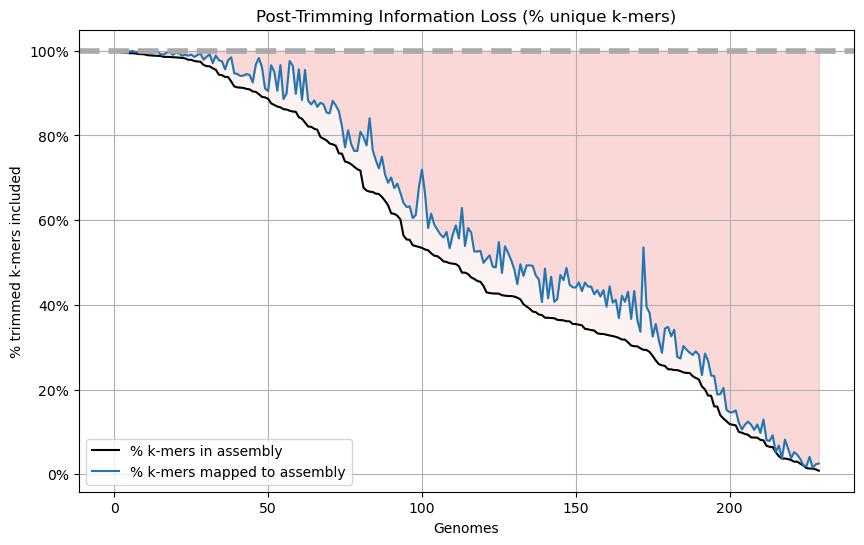

In [7]:
df = df.sort_values(by='norm_assem', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 6))

sns.lineplot(data=df['norm_assem'], label='% k-mers in assembly', color='black')
sns.lineplot(data=df['norm_mapassem'], label='% k-mers mapped to assembly')
plt.axhline(y=1, color='darkgrey', linestyle='--', linewidth=4)  # Add horizontal line at y=1 for 100%

plt.fill_between(df.index, df['norm_mapassem'], 1, color='lightcoral', alpha=0.3)
plt.fill_between(df.index, df['norm_assem'], df['norm_mapassem'], color='lightcoral', alpha=0.1)

plt.xlabel('Genomes')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))  # Set y-axis ticks to display percentages
plt.ylabel('% trimmed k-mers included')
plt.title('Post-Trimming Information Loss (% unique k-mers)')
plt.legend()
plt.grid(True)
plt.show()

### sort by mapassem instead to make that the smoother line

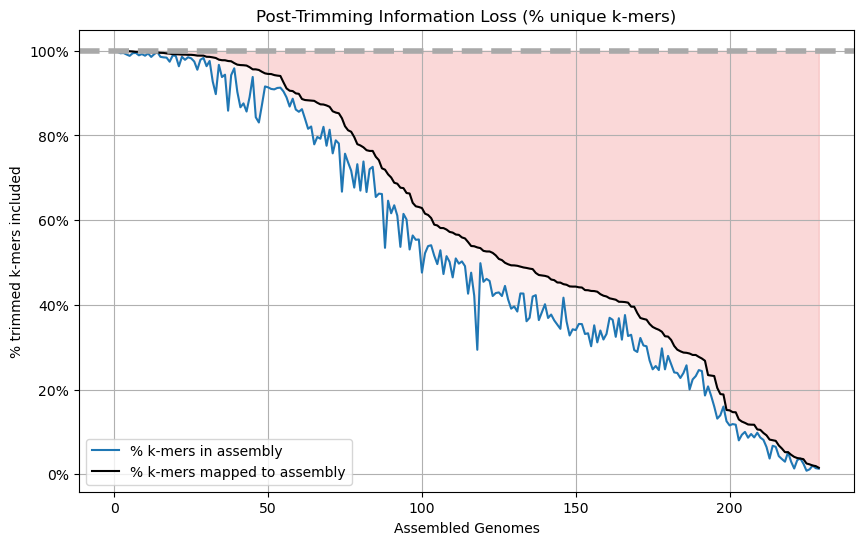

In [8]:
df = df.sort_values(by='norm_mapassem', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 6))

sns.lineplot(data=df['norm_assem'], label='% k-mers in assembly')
sns.lineplot(data=df['norm_mapassem'], label='% k-mers mapped to assembly', color='black')
plt.axhline(y=1, color='darkgrey', linestyle='--', linewidth=4)  # Add horizontal line at y=1 for 100%

plt.fill_between(df.index, df['norm_mapassem'], 1, color='lightcoral', alpha=0.3)
plt.fill_between(df.index, df['norm_assem'], df['norm_mapassem'], color='lightcoral', alpha=0.1)

plt.xlabel('Assembled Genomes')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))  # Set y-axis ticks to display percentages
plt.ylabel('% trimmed k-mers included')
plt.title('Post-Trimming Information Loss (% unique k-mers)')
plt.legend()
plt.grid(True)
plt.savefig('ERR505104.assembly-loss.png')
plt.show()

In [9]:
df.columns

Index(['genome', 'n_chrom', 'n_snps', 'n_genome_bp', 'n_missed_bp',
       'f_missed_bp', 'n_covered_bp', 'f_covered_bp', 'avg_coverage',
       'effective_coverage', 'genome_id', 'sample_id', 'n_mapped_reads',
       'n_diff_reads', '% assembled', 'n_diff3_read', '% map_to_assembly',
       'metagenome', 'trim_cont', 'assem_cont', 'mapassem_cont',
       'assem_v_trim', 'mapassem_v_trim', 'mapassem_v_assem',
       'coverage_category', 'norm_assem', 'norm_mapassem'],
      dtype='object')

### can we represent effective coverage? Is it informative/does it work with this graph?

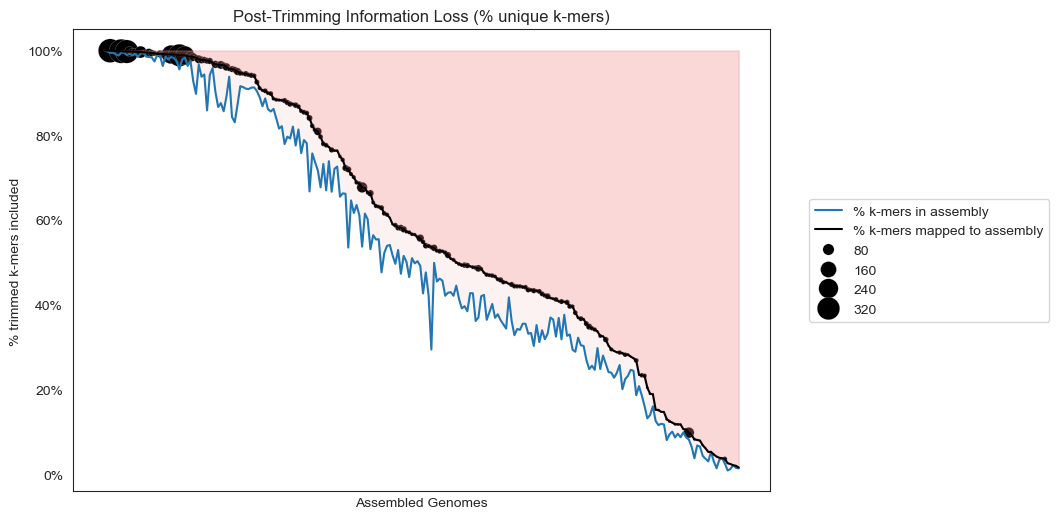

In [10]:
df = df.sort_values(by='norm_mapassem', ascending=False).reset_index(drop=True)

sns.set_style("white")
plt.figure(figsize=(9, 6))

sns.lineplot(data=df['norm_assem'], label='% k-mers in assembly')
# sns.scatterplot(data=df, x='genome', y='norm_assem', size='effective_coverage', sizes=(10,200), legend=False)

sns.lineplot(data=df['norm_mapassem'], label='% k-mers mapped to assembly', color='black')
sns.scatterplot(data=df, x='genome', y='norm_mapassem', size='effective_coverage',sizes=(1,300), color='black')#, legend=False)

# plt.axhline(y=1, color='darkgrey', linestyle='--', linewidth=4)  # Add horizontal line at y=1 for 100%

plt.fill_between(df.index, df['norm_mapassem'], 1, color='lightcoral', alpha=0.3)
plt.fill_between(df.index, df['norm_assem'], df['norm_mapassem'], color='lightcoral', alpha=0.1)

plt.xlabel('Assembled Genomes')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))  # Set y-axis ticks to display percentages
plt.ylabel('% trimmed k-mers included')
plt.title('Post-Trimming Information Loss (% unique k-mers)')
plt.xticks([]) # remove genome name labels
plt.legend(loc='right', bbox_to_anchor=(1.4, 0.5), borderaxespad=0)

plt.savefig('ERR505104.assembly-loss-cov.png', bbox_inches='tight')

plt.show()


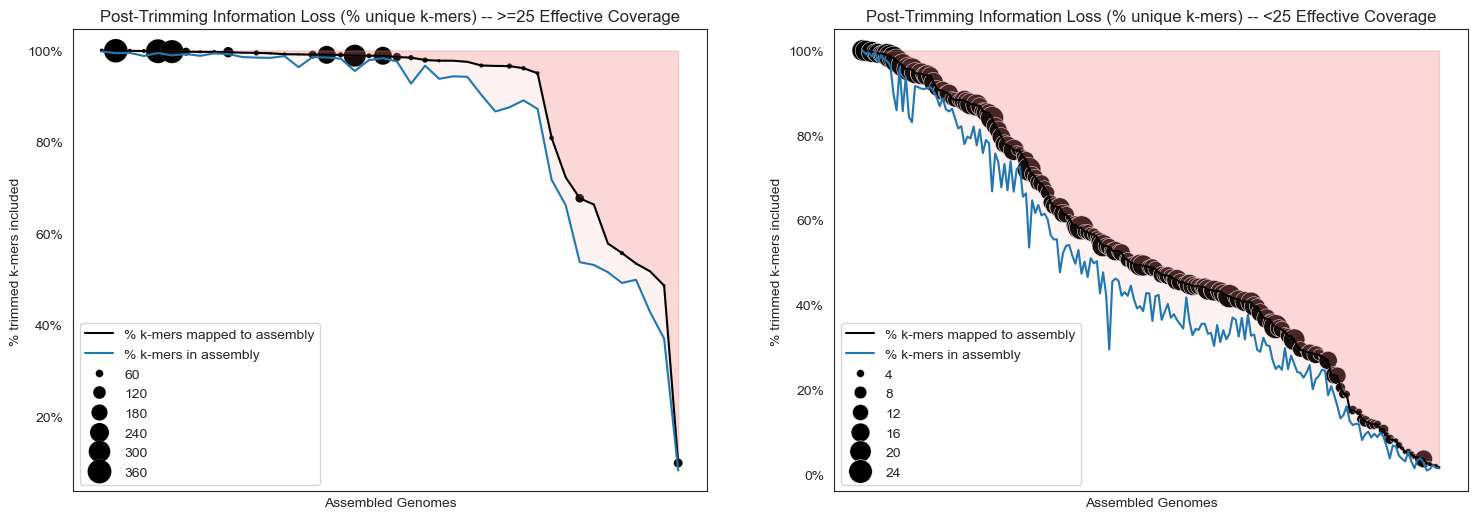

In [11]:
# Sort DataFrame
df = df.sort_values(by='norm_mapassem', ascending=False).reset_index(drop=True)

# Filter DataFrame based on effective coverage
high_coverage_df = df[df['effective_coverage'] >= 25]
low_coverage_df = df[df['effective_coverage'] < 25]

# Create two separate plots
plt.figure(figsize=(18, 6))

# Plot for high effective coverage
plt.subplot(1, 2, 1)
sns.lineplot(data=high_coverage_df, x='genome', y='norm_mapassem', label='% k-mers mapped to assembly', color='black')
sns.lineplot(data=high_coverage_df, x='genome', y='norm_assem', label='% k-mers in assembly')
sns.scatterplot(data=high_coverage_df, x='genome', y='norm_mapassem', size='effective_coverage', sizes=(1, 300), color='black')
plt.fill_between(high_coverage_df['genome'], high_coverage_df['norm_mapassem'], 1, color='lightcoral', alpha=0.3)
plt.fill_between(high_coverage_df['genome'], high_coverage_df['norm_assem'], high_coverage_df['norm_mapassem'], color='lightcoral', alpha=0.1)

plt.xlabel('Assembled Genomes')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))
plt.ylabel('% trimmed k-mers included')
plt.title('Post-Trimming Information Loss (% unique k-mers) -- >=25 Effective Coverage')
plt.xticks([])  # Remove genome name labels
plt.legend()
# plt.legend(loc='right', bbox_to_anchor=(1.4, 0.5), borderaxespad=0)

# Plot for low effective coverage
plt.subplot(1, 2, 2)
sns.lineplot(data=low_coverage_df, x='genome', y='norm_mapassem', label='% k-mers mapped to assembly', color='black')
sns.lineplot(data=low_coverage_df, x='genome', y='norm_assem', label='% k-mers in assembly')
sns.scatterplot(data=low_coverage_df, x='genome', y='norm_mapassem', size='effective_coverage', sizes=(1, 300), color='black')
plt.fill_between(low_coverage_df['genome'], low_coverage_df['norm_mapassem'], 1, color='lightcoral', alpha=0.3)
plt.fill_between(low_coverage_df['genome'], low_coverage_df['norm_assem'], low_coverage_df['norm_mapassem'], color='lightcoral', alpha=0.1)
plt.xlabel('Assembled Genomes')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))
plt.ylabel('% trimmed k-mers included')
plt.title('Post-Trimming Information Loss (% unique k-mers) -- <25 Effective Coverage')
plt.xticks([])  # Remove genome name labels
plt.legend(loc='lower left')#, bbox_to_anchor=(1.4, 0.5), borderaxespad=0)

# Save the plots to PNG file
plt.savefig('ERR505104.assembly-loss-cov2.png', bbox_inches='tight')

plt.show()

## bin the coverage instead

In [12]:
# bin edges
bins = [0, 5, 10, 15, 20, float('inf')]

# bin labels
labels = ['0-5', '5-10', '10-15', '15-20', '20+']
reversed_labels = labels[::-1] # need reversed for plotting large --> small to correspond with point size

# bin the 'effective_coverage' column
df['eff_cov_bins'] = pd.cut(df['effective_coverage'], bins=bins, labels=labels, right=False)
df.head()

,genome,n_chrom,n_snps,n_genome_bp,n_missed_bp,f_missed_bp,n_covered_bp,f_covered_bp,avg_coverage,effective_coverage,...,trim_cont,assem_cont,mapassem_cont,assem_v_trim,mapassem_v_trim,mapassem_v_assem,coverage_category,norm_assem,norm_mapassem,eff_cov_bins
0,GCA_900539375,52,1028,2927434,14,0.000005,2927420,0.999995,20.012853,20.012949,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,20-50,1.000000,1.000000,20+
1,GCA_934880285,57,22904,2949092,172921,0.058635,2776171,0.941365,31.377708,33.332150,...,0.781336,0.779614,0.781336,0.001722,0.000000,0.001722,20-50,0.997796,1.000000,20+
2,GCF_021409785,168,25750,5730670,744406,0.129899,4986264,0.870101,307.108108,352.956687,...,0.783765,0.779102,0.783247,0.004663,0.000518,0.004145,NaN,0.994050,0.999339,20+
3,GCA_900538755,38,20268,3004049,130359,0.043394,2873690,0.956606,33.020922,34.518848,...,0.829376,0.824966,0.828697,0.004410,0.000678,0.003731,20-50,0.994683,0.999182,20+
4,GCA_003432325,1,27546,2845495,421959,0.148290,2423536,0.851710,16.434039,19.295351,...,0.690699,0.684571,0.689978,0.006128,0.000721,0.005407,10-20,0.991127,0.998956,15-20


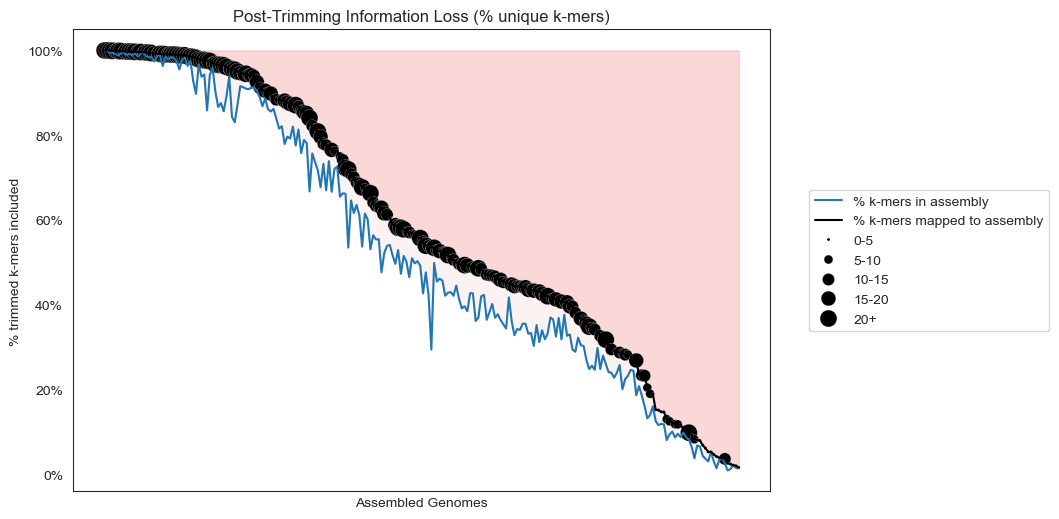

In [13]:
df = df.sort_values(by='norm_mapassem', ascending=False).reset_index(drop=True)

sns.set_style("white")
plt.figure(figsize=(9, 6))

# do these first so they're at the back and everything else is plotted on top
plt.fill_between(df.index, df['norm_mapassem'], 1, color='lightcoral', alpha=0.3)
plt.fill_between(df.index, df['norm_assem'], df['norm_mapassem'], color='lightcoral', alpha=0.1)
sns.lineplot(data=df['norm_assem'], label='% k-mers in assembly')
# sns.scatterplot(data=df, x='genome', y='norm_assem', size='effective_coverage', sizes=(10,200), legend=False)

sns.lineplot(data=df['norm_mapassem'], label='% k-mers mapped to assembly', color='black')
sns.scatterplot(data=df, x='genome', y='norm_mapassem', size='eff_cov_bins',sizes=(150, 5), hue_order=reversed_labels, color='black')#, legend=False)

# plt.axhline(y=1, color='darkgrey', linestyle='--', linewidth=4)  # Add horizontal line at y=1 for 100%
plt.xlabel('Assembled Genomes')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))  # Set y-axis ticks to display percentages
plt.ylabel('% trimmed k-mers included')
plt.title('Post-Trimming Information Loss (% unique k-mers)')
plt.xticks([]) # remove genome name labels
plt.legend(loc='right', bbox_to_anchor=(1.4, 0.5), borderaxespad=0)

plt.savefig('ERR505104.assembly-loss-cov-bin.png', bbox_inches='tight')

plt.show()


### use thicker edge to see if it's easier to viz boundaries


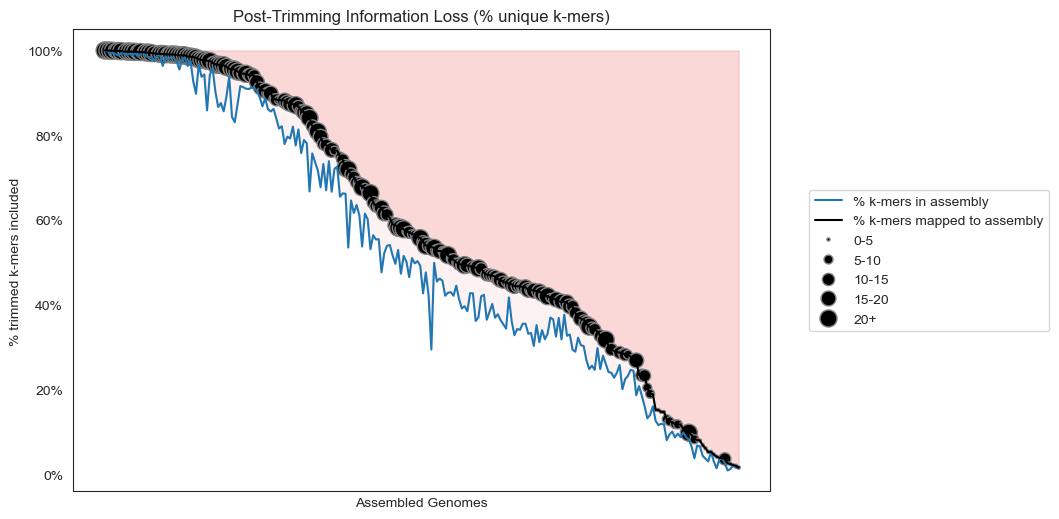

In [14]:
df = df.sort_values(by='norm_mapassem', ascending=False).reset_index(drop=True)

sns.set_style("white")
plt.figure(figsize=(9, 6))

# do these first so they're at the back and everything else is plotted on top
plt.fill_between(df.index, df['norm_mapassem'], 1, color='lightcoral', alpha=0.3)
plt.fill_between(df.index, df['norm_assem'], df['norm_mapassem'], color='lightcoral', alpha=0.1)
sns.lineplot(data=df['norm_assem'], label='% k-mers in assembly')
# sns.scatterplot(data=df, x='genome', y='norm_assem', size='effective_coverage', sizes=(10,200), legend=False)
 
sns.lineplot(data=df['norm_mapassem'], label='% k-mers mapped to assembly', color='black')
sns.scatterplot(data=df, x='genome', y='norm_mapassem', size='eff_cov_bins',sizes=(150, 5), hue_order=reversed_labels, color='black', edgecolor='grey', linewidth=1)#, legend=False)

# plt.axhline(y=1, color='darkgrey', linestyle='--', linewidth=4)  # Add horizontal line at y=1 for 100%
plt.xlabel('Assembled Genomes')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))  # Set y-axis ticks to display percentages
plt.ylabel('% trimmed k-mers included')
plt.title('Post-Trimming Information Loss (% unique k-mers)')
plt.xticks([]) # remove genome name labels
plt.legend(loc='right', bbox_to_anchor=(1.4, 0.5), borderaxespad=0)

plt.savefig('ERR505104.assembly-loss-cov-bin.png', bbox_inches='tight')

plt.show()


#### try removing mapassem line in favor of just points

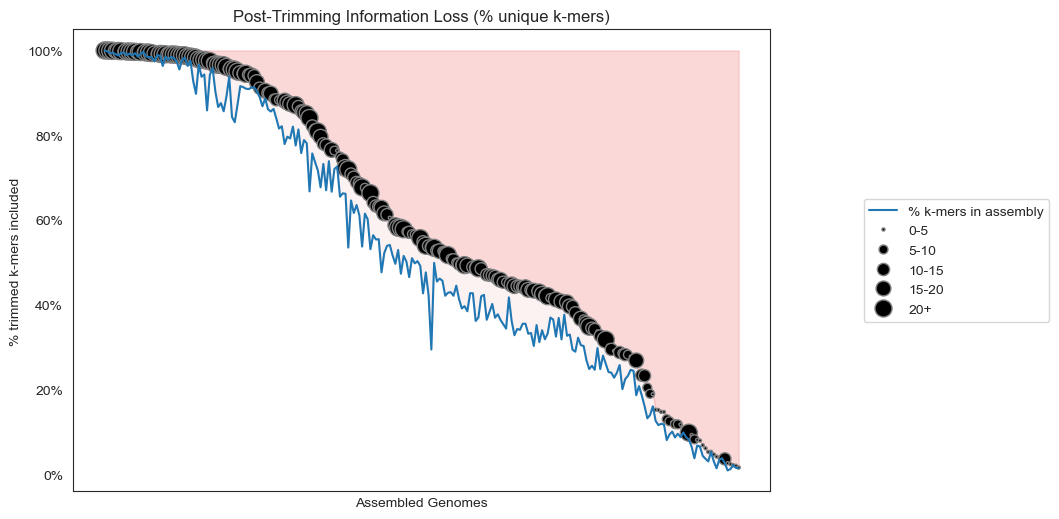

In [15]:
df = df.sort_values(by='norm_mapassem', ascending=False).reset_index(drop=True)

sns.set_style("white")
plt.figure(figsize=(9, 6))

# do these first so they're at the back and everything else is plotted on top
plt.fill_between(df.index, df['norm_mapassem'], 1, color='lightcoral', alpha=0.3)
plt.fill_between(df.index, df['norm_assem'], df['norm_mapassem'], color='lightcoral', alpha=0.1)
sns.lineplot(data=df['norm_assem'], label='% k-mers in assembly')
# sns.scatterplot(data=df, x='genome', y='norm_assem', size='effective_coverage', sizes=(10,200), legend=False)
 
# sns.lineplot(data=df['norm_mapassem'], label='% k-mers mapped to assembly', color='black')
sns.scatterplot(data=df, x='genome', y='norm_mapassem', size='eff_cov_bins',sizes=(150, 5), hue_order=reversed_labels, color='black', edgecolor='grey', linewidth=1)#, legend=False)

# plt.axhline(y=1, color='darkgrey', linestyle='--', linewidth=4)  # Add horizontal line at y=1 for 100%
plt.xlabel('Assembled Genomes')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))  # Set y-axis ticks to display percentages
plt.ylabel('% trimmed k-mers included')
plt.title('Post-Trimming Information Loss (% unique k-mers)')
plt.xticks([]) # remove genome name labels
plt.legend(loc='right', bbox_to_anchor=(1.4, 0.5), borderaxespad=0)

plt.savefig('ERR505104.assembly-loss-cov-bin.png', bbox_inches='tight')

plt.show()

In [16]:
df.columns

Index(['genome', 'n_chrom', 'n_snps', 'n_genome_bp', 'n_missed_bp',
       'f_missed_bp', 'n_covered_bp', 'f_covered_bp', 'avg_coverage',
       'effective_coverage', 'genome_id', 'sample_id', 'n_mapped_reads',
       'n_diff_reads', '% assembled', 'n_diff3_read', '% map_to_assembly',
       'metagenome', 'trim_cont', 'assem_cont', 'mapassem_cont',
       'assem_v_trim', 'mapassem_v_trim', 'mapassem_v_assem',
       'coverage_category', 'norm_assem', 'norm_mapassem', 'eff_cov_bins'],
      dtype='object')

# Explore large (& small) diffs between assem and mapassem

In [17]:
df['norm_diff_assem_mapassem'] = df['norm_mapassem']- df['norm_assem']
df['diff_assem_mapassem'] = df['mapassem_cont']- df['assem_cont']

In [18]:
df['norm_diff_assem_mapassem'].head()

0    0.000000
1    0.002204
2    0.005289
3    0.004499
4    0.007829
Name: norm_diff_assem_mapassem, dtype: float64

In [19]:
df['norm_diff_assem_mapassem'].max()

0.24166666666666675

In [20]:
df['norm_diff_assem_mapassem'].idxmax()

118

In [21]:
df = df.sort_values(by='norm_diff_assem_mapassem', ascending=False)
df['perc_snp'] = df['n_snps']/df['n_genome_bp']*100
df[['genome', 'n_genome_bp', 'n_snps', 'perc_snp', 'trim_cont', 'assem_cont', 'mapassem_cont', 'diff_assem_mapassem']].head()

,genome,n_genome_bp,n_snps,perc_snp,trim_cont,assem_cont,mapassem_cont,diff_assem_mapassem
118,GCA_934318055,2923275,58583,2.004019,0.574359,0.168889,0.307692,0.138803
88,GCF_020559725,3647864,32874,0.901185,0.170568,0.091203,0.122680,0.031477
74,GCF_013301975,3683590,53729,1.458604,0.286133,0.190933,0.240533,0.049600
100,GCA_020554405,3333967,48973,1.468911,0.428786,0.204198,0.269565,0.065367
93,GCF_024460435,3869849,17481,0.451723,0.097281,0.052239,0.065832,0.013593


In [22]:
df[['genome', 'n_genome_bp', 'n_snps', 'perc_snp', 'trim_cont', 'assem_cont', 'mapassem_cont', 'norm_diff_assem_mapassem']].tail()

,genome,n_genome_bp,n_snps,perc_snp,trim_cont,assem_cont,mapassem_cont,norm_diff_assem_mapassem
223,GCA_900754185,1840170,687,0.037334,0.072550,0.002707,0.002707,0.000000
219,GCA_018370075,2765433,1392,0.050336,0.069303,0.003628,0.003628,0.000000
227,GCA_944377425,2406848,3376,0.140266,0.079834,0.001663,0.001663,0.000000
0,GCA_900539375,2927434,1028,0.035116,1.000000,1.000000,1.000000,0.000000
14,GCA_003531605,1833693,2658,0.144953,0.949915,0.947069,0.945931,-0.001198


In [23]:
df['perc_snp'].max()

2.370908760413885

<Axes: xlabel='perc_snp', ylabel='norm_diff_assem_mapassem'>

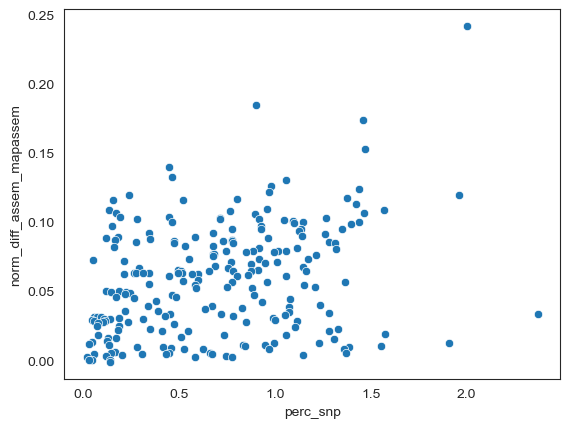

In [24]:
sns.scatterplot(data=df, x='perc_snp', y='norm_diff_assem_mapassem')


<Axes: xlabel='perc_snp', ylabel='effective_coverage'>

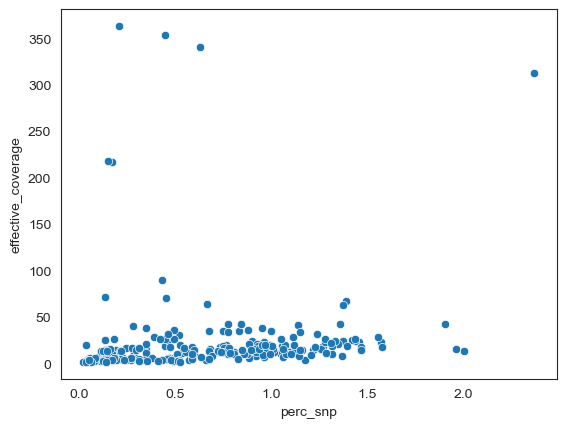

In [25]:
sns.scatterplot(data=df, x='perc_snp', y='effective_coverage')

<Axes: xlabel='n_snps', ylabel='norm_diff_assem_mapassem'>

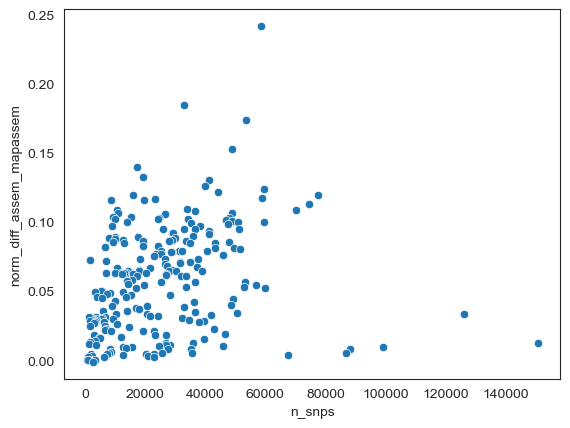

In [26]:
sns.scatterplot(data=df, x='n_snps', y='norm_diff_assem_mapassem')


### the next two seem most useful -- n_snpxs x diff between assembly & mapassembly


<Axes: xlabel='n_snps', ylabel='diff_assem_mapassem'>

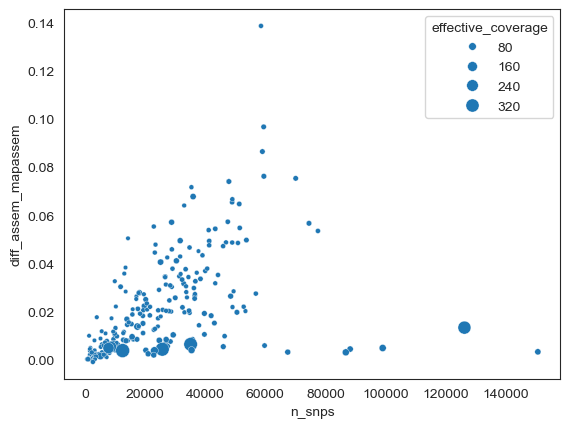

In [27]:
sns.scatterplot(data=df, x='n_snps', y='diff_assem_mapassem', size= 'effective_coverage', sizes=(10,100))

<Axes: xlabel='n_snps', ylabel='diff_assem_mapassem'>

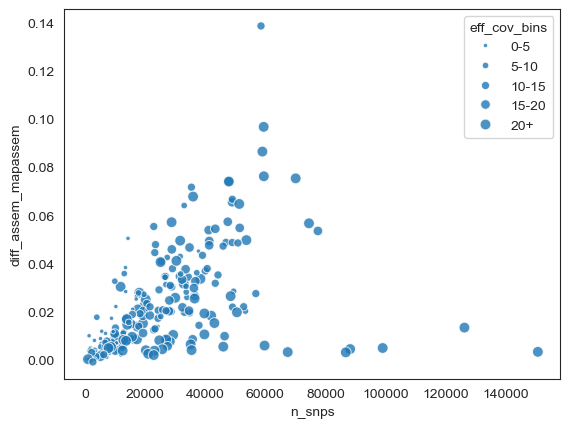

In [28]:
sns.scatterplot(data=df, x='n_snps', y='diff_assem_mapassem', size= 'eff_cov_bins',sizes=(60, 10), alpha=0.8,  edgecolor='white', linewidth=0.7)

### try looking at only coverage under 20...

<Axes: xlabel='n_snps', ylabel='diff_assem_mapassem'>

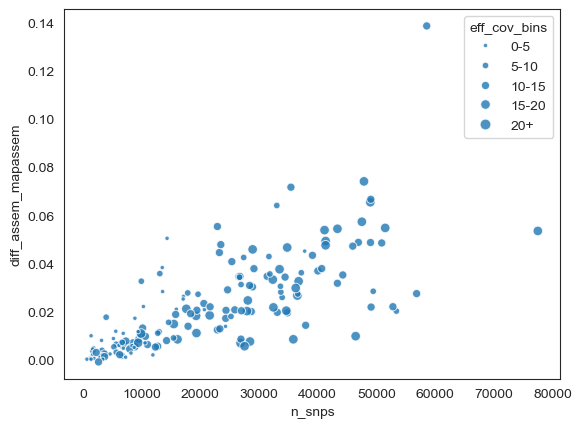

In [29]:
df_under20cov = df[df['effective_coverage'] < 20]
sns.scatterplot(data=df_under20cov, x='n_snps', y='diff_assem_mapassem', size= 'eff_cov_bins',sizes=(60, 10), alpha=0.8,  edgecolor='white', linewidth=0.7)

<Axes: xlabel='n_snps', ylabel='diff_assem_mapassem'>

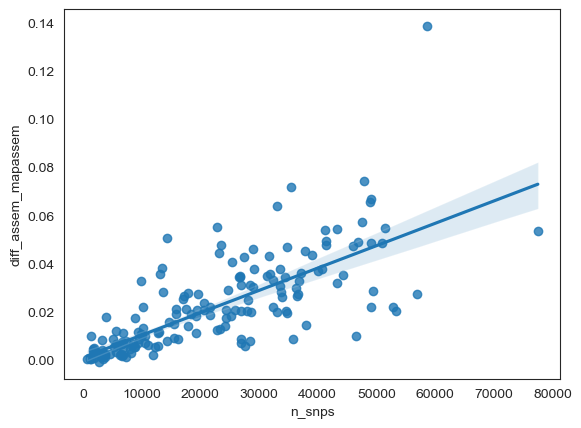

In [30]:
# regression plot, under 20 cov
sns.regplot(data=df_under20cov,x='n_snps', y='diff_assem_mapassem', robust=True)


In [31]:
# get R^2 value for the regression line
import scipy.stats as stats
# all data
res = stats.linregress(df['n_snps'], df['diff_assem_mapassem'])
r_squared = res.rvalue ** 2
print("R-squared:", r_squared)
# under 20 eff cov
res = stats.linregress(df_under20cov['n_snps'], df_under20cov['diff_assem_mapassem'])
r_squared = res.rvalue ** 2
print("R-squared:", r_squared)

R-squared: 0.21779450722104848
R-squared: 0.5471547957282086


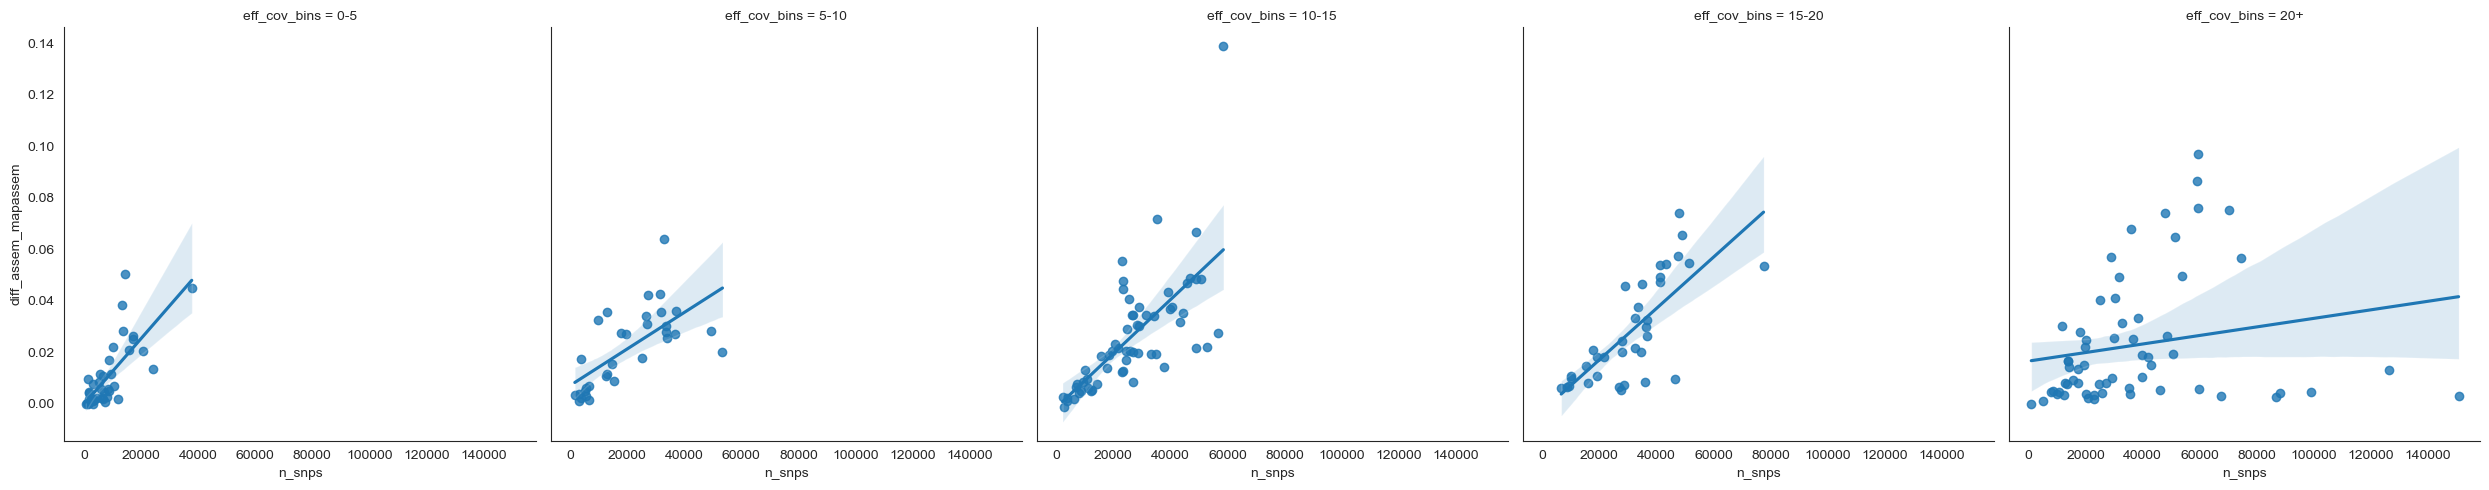

In [32]:
# plot all, split by effective coverage bins
sns.lmplot(data=df,x='n_snps', y='diff_assem_mapassem', col='eff_cov_bins')

In [33]:
df.columns


Index(['genome', 'n_chrom', 'n_snps', 'n_genome_bp', 'n_missed_bp',
       'f_missed_bp', 'n_covered_bp', 'f_covered_bp', 'avg_coverage',
       'effective_coverage', 'genome_id', 'sample_id', 'n_mapped_reads',
       'n_diff_reads', '% assembled', 'n_diff3_read', '% map_to_assembly',
       'metagenome', 'trim_cont', 'assem_cont', 'mapassem_cont',
       'assem_v_trim', 'mapassem_v_trim', 'mapassem_v_assem',
       'coverage_category', 'norm_assem', 'norm_mapassem', 'eff_cov_bins',
       'norm_diff_assem_mapassem', 'diff_assem_mapassem', 'perc_snp'],
      dtype='object')

# try including the loss from original --> k-mer based analysis

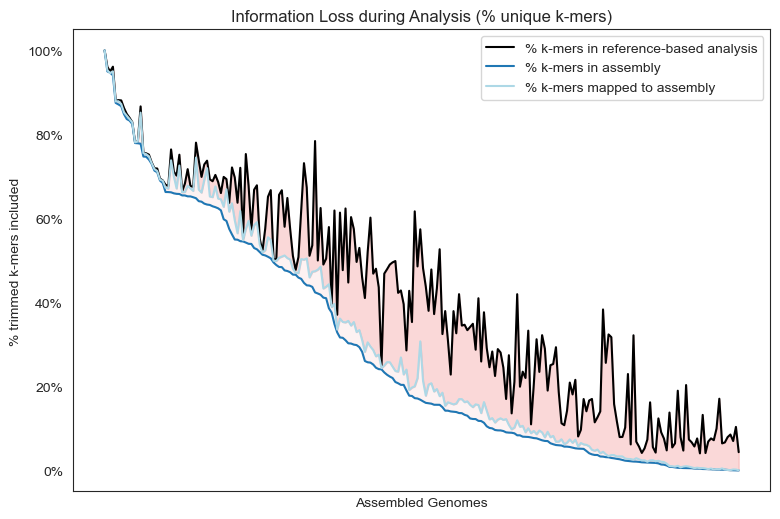

In [34]:
df = df.sort_values(by='assem_cont', ascending=False).reset_index(drop=True)

sns.set_style("white")
plt.figure(figsize=(9, 6))

# do these first so they're at the back and everything else is plotted on top
plt.fill_between(df.index, df['trim_cont'], df['mapassem_cont'], color='lightcoral', alpha=0.3)
plt.fill_between(df.index, df['assem_cont'], df['mapassem_cont'], color='lightcoral', alpha=0.1)
sns.lineplot(data=df, x='genome', y='trim_cont', label='% k-mers in reference-based analysis', color='black')
sns.lineplot(data=df, x='genome', y='assem_cont', label='% k-mers in assembly')
sns.lineplot(data=df, x='genome', y='mapassem_cont', label='% k-mers mapped to assembly', color='lightblue')

plt.xlabel('Assembled Genomes')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))  # Set y-axis ticks to display percentages
plt.ylabel('% trimmed k-mers included')
plt.title('Information Loss during Analysis (% unique k-mers)')
plt.xticks([]) # remove genome name labels
plt.legend(loc='upper right')#, bbox_to_anchor=(1.4, 0.5), borderaxespad=0)

plt.savefig('ERR505104.content-loss-sortassem.png', bbox_inches='tight')

plt.show()

# sort by mapassem_cont

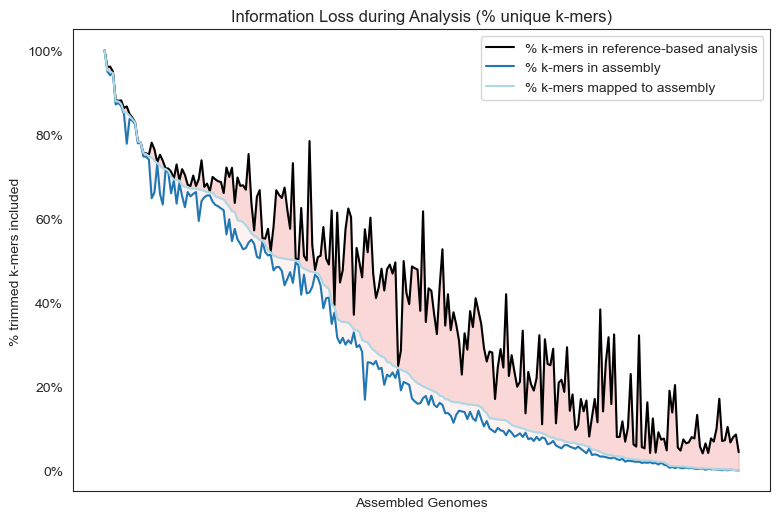

In [35]:
df = df.sort_values(by='mapassem_cont', ascending=False).reset_index(drop=True)

sns.set_style("white")
plt.figure(figsize=(9, 6))

# do these first so they're at the back and everything else is plotted on top
plt.fill_between(df.index, df['trim_cont'], df['mapassem_cont'], color='lightcoral', alpha=0.3)
plt.fill_between(df.index, df['assem_cont'], df['mapassem_cont'], color='lightcoral', alpha=0.1)
sns.lineplot(data=df, x='genome', y='trim_cont', label='% k-mers in reference-based analysis', color='black')
sns.lineplot(data=df, x='genome', y='assem_cont', label='% k-mers in assembly')
sns.lineplot(data=df, x='genome', y='mapassem_cont', label='% k-mers mapped to assembly', color='lightblue')

plt.xlabel('Assembled Genomes')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))  # Set y-axis ticks to display percentages
plt.ylabel('% trimmed k-mers included')
plt.title('Information Loss during Analysis (% unique k-mers)')
plt.xticks([]) # remove genome name labels
plt.legend(loc='upper right')#, bbox_to_anchor=(1.4, 0.5), borderaxespad=0)

plt.savefig('ERR505104.content-loss-sortmapassem.png', bbox_inches='tight')

plt.show()

# sort by trim_cont instead
this one looks most intuitive to me

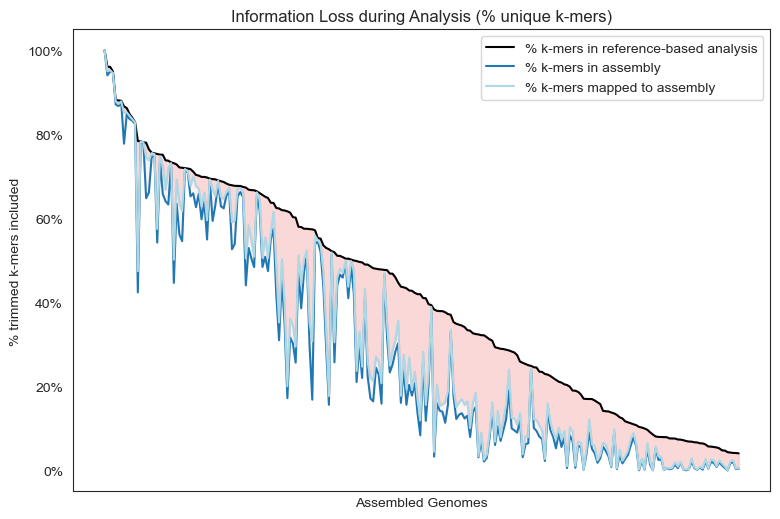

In [36]:
df = df.sort_values(by='trim_cont', ascending=False).reset_index(drop=True)

sns.set_style("white")
plt.figure(figsize=(9, 6))

# do these first so they're at the back and everything else is plotted on top
plt.fill_between(df.index, df['trim_cont'], df['mapassem_cont'], color='lightcoral', alpha=0.3)
plt.fill_between(df.index, df['assem_cont'], df['mapassem_cont'], color='lightcoral', alpha=0.1)
sns.lineplot(data=df, x='genome', y='trim_cont', label='% k-mers in reference-based analysis', color='black')
sns.lineplot(data=df, x='genome', y='assem_cont', label='% k-mers in assembly')
sns.lineplot(data=df, x='genome', y='mapassem_cont', label='% k-mers mapped to assembly', color='lightblue')

# plt.axhline(y=1, color='darkgrey', linestyle='--', linewidth=4)  # Add horizontal line at y=1 for 100%
plt.xlabel('Assembled Genomes')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))  # Set y-axis ticks to display percentages
plt.ylabel('% trimmed k-mers included')
plt.title('Information Loss during Analysis (% unique k-mers)')
plt.xticks([]) # remove genome name labels
plt.legend(loc='upper right')#, bbox_to_anchor=(1.4, 0.5), borderaxespad=0)

plt.savefig('ERR505104.content-loss.png', bbox_inches='tight')

plt.show()

### try adding effective coverage viz.
...Not really helpful

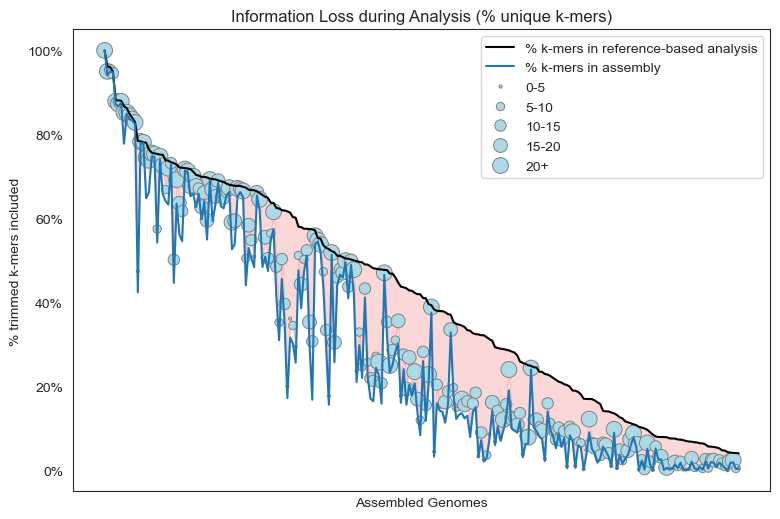

In [37]:
df = df.sort_values(by='trim_cont', ascending=False).reset_index(drop=True)
# df = df.sort_values(by='mapassem_cont', ascending=False).reset_index(drop=True)

sns.set_style("white")
plt.figure(figsize=(9, 6))

# do these first so they're at the back and everything else is plotted on top
plt.fill_between(df.index, df['trim_cont'], df['mapassem_cont'], color='lightcoral', alpha=0.3)
plt.fill_between(df.index, df['assem_cont'], df['mapassem_cont'], color='lightcoral', alpha=0.1)
sns.lineplot(data=df, x='genome', y='trim_cont', label='% k-mers in reference-based analysis', color='black')
sns.lineplot(data=df, x='genome', y='assem_cont', label='% k-mers in assembly')
sns.scatterplot(data=df, x='genome', y='mapassem_cont', size='eff_cov_bins',sizes=(130, 5), hue_order=reversed_labels, color='lightblue', edgecolor='grey', linewidth=0.7)#, legend=False)

# plt.axhline(y=1, color='darkgrey', linestyle='--', linewidth=4)  # Add horizontal line at y=1 for 100%
plt.xlabel('Assembled Genomes')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))  # Set y-axis ticks to display percentages
plt.ylabel('% trimmed k-mers included')
plt.title('Information Loss during Analysis (% unique k-mers)')
plt.xticks([]) # remove genome name labels
plt.legend(loc='upper right')#, bbox_to_anchor=(1.4, 0.5), borderaxespad=0)

plt.savefig('ERR505104.content-loss-cov.png', bbox_inches='tight')

plt.show()